In [1]:
import pandas as pd
from pyvis.network import Network
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pickle
from pydiffmap.visualization import embedding_plot, data_plot
from pydiffmap import diffusion_map as dm
import umap

In [2]:
df = pd.read_csv("responses.csv")
df = df.iloc[:, 32:63]
df = df.dropna(axis=0)
df.head()

,Psychology,Politics,Mathematics,Physics,Internet,PC,Economy Management,Biology,Chemistry,Reading,...,Passive sport,Active sport,Gardening,Celebrities,Shopping,Science and technology,Theatre,Fun with friends,Adrenaline sports,Pets
0,5.0,1.0,3.0,3.0,5.0,3.0,5.0,3.0,3.0,3.0,...,1.0,5.0,5.0,1.0,4.0,4.0,2.0,5.0,4.0,4.0
1,3.0,4.0,5.0,2.0,4.0,4.0,5.0,1.0,1.0,4.0,...,1.0,1.0,1.0,2.0,3.0,3.0,2.0,4.0,2.0,5.0
2,2.0,1.0,5.0,2.0,4.0,2.0,4.0,1.0,1.0,5.0,...,5.0,2.0,1.0,1.0,4.0,2.0,5.0,5.0,5.0,5.0
3,4.0,5.0,4.0,1.0,3.0,1.0,2.0,3.0,3.0,5.0,...,1.0,1.0,1.0,2.0,4.0,3.0,1.0,2.0,1.0,1.0
4,2.0,3.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,5.0,...,3.0,1.0,4.0,3.0,3.0,3.0,2.0,4.0,2.0,1.0


In [4]:
with open('interest_names.obj', 'wb') as fp:
    pickle.dump(df.columns, fp)

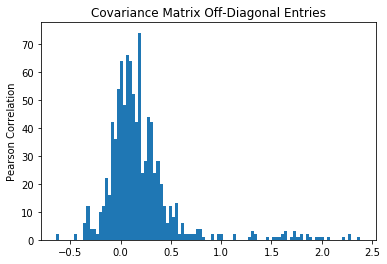

In [16]:
interesst_mean = df.mean(axis=0)
cor = np.cov(df.to_numpy(), rowvar=False)
plt.hist(cor.flatten(), bins = 100)
plt.title("Covariance Matrix Off-Diagonal Entries")
plt.ylabel("Correlation Frequency")
plt.ylabel("Pearson Correlation")
plt.show()

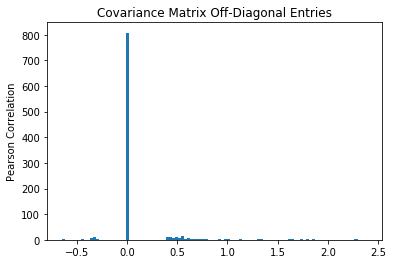

In [17]:
for i in range(cor.shape[0]):
    for j in range(cor.shape[1]):
        if -0.3 < cor[i, j] < 0.4:
            cor[i, j] = 0

plt.hist(cor.flatten(), bins = 100)
plt.title("Covariance Matrix Off-Diagonal Entries")
plt.ylabel("Correlation Frequency")
plt.ylabel("Pearson Correlation")
plt.show()

In [18]:
conn_pd = pd.DataFrame(np.empty(shape =(cor.shape[0]*cor.shape[0], 4)), columns=['Source', 'Target', 'Type', 'Weigth'])

cat_x = list(df.columns)
cat_y = [item for item in cat_x for i in range(cor.shape[0])]
cat_x = cat_x*cor.shape[0]

cor_flatt = cor.flatten()
for i in range(cor.shape[0]*cor.shape[0]):
    conn_pd.iloc[i, 0] = cat_x[i]
    conn_pd.iloc[i, 1] = cat_y[i]
    conn_pd.iloc[i, 2] = 'Directed'
    conn_pd.iloc[i, 3] = cor_flatt[i]
    
index_zero = conn_pd[ conn_pd['Weigth'] == 0].index
index_self = conn_pd[ conn_pd['Source'] == conn_pd['Target']].index
# Delete these row indexes from dataFrame
conn_pd.drop(index_zero, inplace=True)
conn_pd.drop(index_self, inplace=True)

In [19]:
G = nx.from_pandas_edgelist(conn_pd, source = 'Source', target = 'Target', edge_attr = 'Weigth')

In [20]:
net = Network(notebook = True)
net.from_nx(G)
net.show('int.html')

In [ ]:
samples = 5000

In [ ]:
customer_interessts = np.random.multivariate_normal(interesst_mean, cor, samples)

In [ ]:
customer_interessts = customer_interessts/5
customer_interessts = np.where(customer_interessts < 1, customer_interessts, 1)
customer_interessts = np.where(customer_interessts > 0, customer_interessts, 0)

In [ ]:
with open('corr.obj', 'wb') as fp:
    pickle.dump(cor, fp)

In [ ]:
with open('means.obj', 'wb') as fp:
    pickle.dump(interesst_mean, fp)